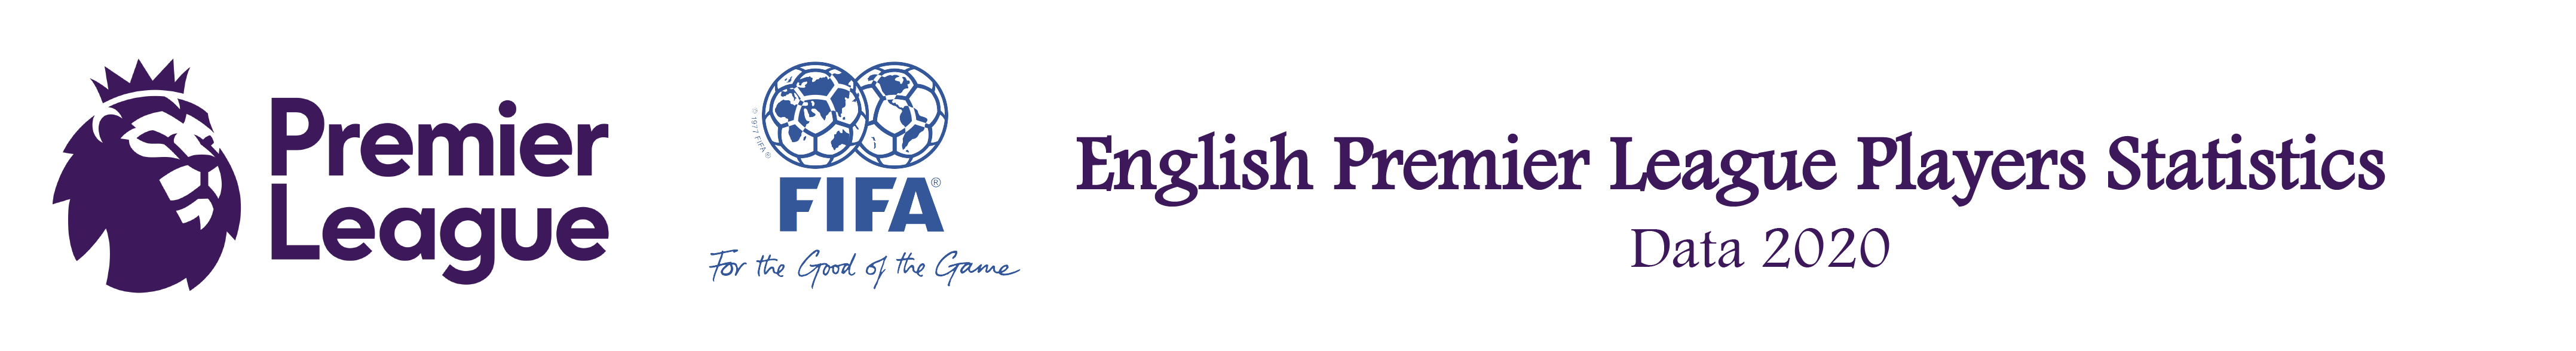

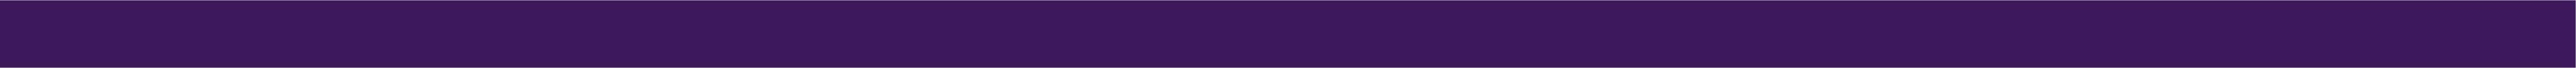

<h1 style="padding:10px;
    background-color: #3D195B;
    color:white;
    font-family:computermodern;
    font-size:250%;
    text-align:center;">Import libraries</h1>

In [36]:
# import libraries
import numpy as np #for linear algebra
import pandas as pd  #for dataframes
import matplotlib.pyplot as plt #for data visualization
%matplotlib inline
import seaborn as sns #for data visualization

from sklearn.impute import SimpleImputer #for data cleaning

<h1 style="padding:10px;
    background-color: #3D195B;
    color:white;
    font-family:computermodern;
    font-size:250%;
    text-align:center;">Import Dataset</h1>

In [37]:
#dataset - 2020-09-24
data = pd.read_csv("dataset - 2020-09-24.csv", )
headers = [{
    'selector': 'th',
    'props': 'background-color: #3D195B; color: white;'
}]
data.style.set_table_styles(headers)

In [38]:
data.shape

(571, 59)

In [39]:
# column names
data.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [40]:
# more information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [41]:
data.head(5)

Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances  Wins  Losses  Goals  ...  Punches  High Claims  Catches  \
0           64    28      16      0  ...     34.0         26.0     17.0   
1            0     0       0      0  ...      0.0          0.0      0.0   
2            0     0       0      0  ...      0.0          0.0      0.0   
3          160    90      37      7  ...      NaN          NaN      NaN   
4           16     7       5      1  ...      NaN          NaN      NaN   

   Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  Red cards Fouls  \
0                28.0       375.0       489.0             2          0     0   
1                 0.0         0.0         0.0             0          0     0   
2                 0.0         0.0         0.0             0          0     0   
3                 NaN         NaN         NaN            23          0   125   
4                 NaN         NaN         NaN             2          0     9   

   Offsides  
0       NaN  
1       NaN  
2       NaN  
3       8.0  
4       0.0  

[5 rows x 59 columns]

<h1 style="padding:10px;
    background-color: #3D195B;
    color:white;
    font-family:computermodern;
    font-size:250%;
    text-align:center;">Data Cleaning</h1>

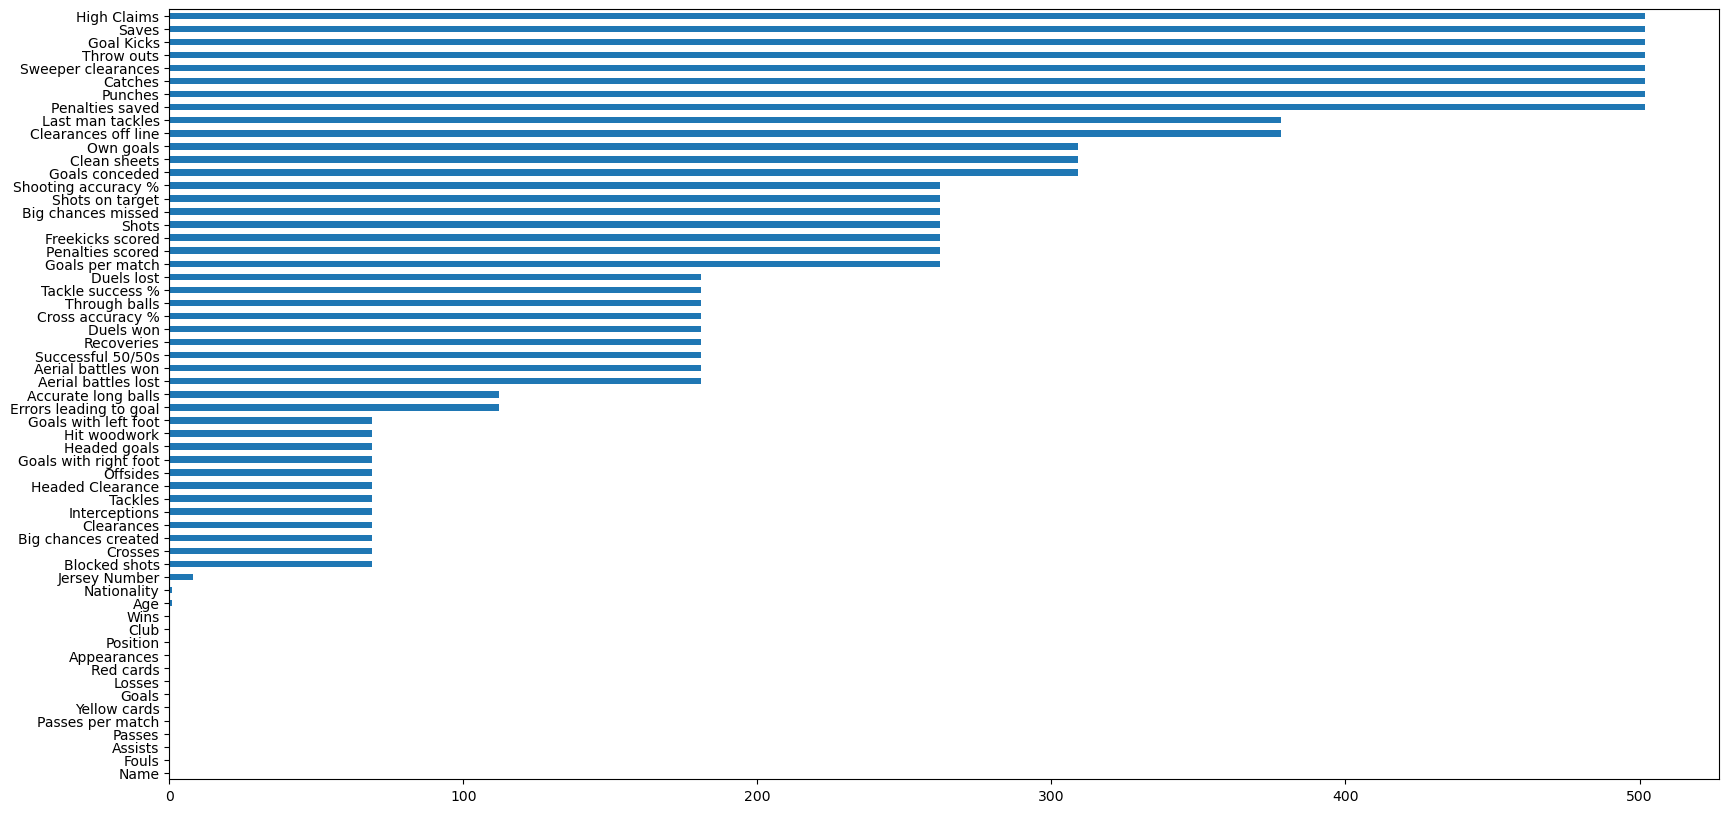

In [42]:
# check the missing values
fig = plt.figure(figsize=(20,10))
missing_val = data.isna().sum().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [43]:
# drop missing values 
for c ,v in data.items():
    missing_values = data[c].isna().sum()
    precentage = (missing_values/data.shape[0])*100
    if precentage >= 50.00:
        data.drop(c, axis=1, inplace=True)
data.shape[1]

46

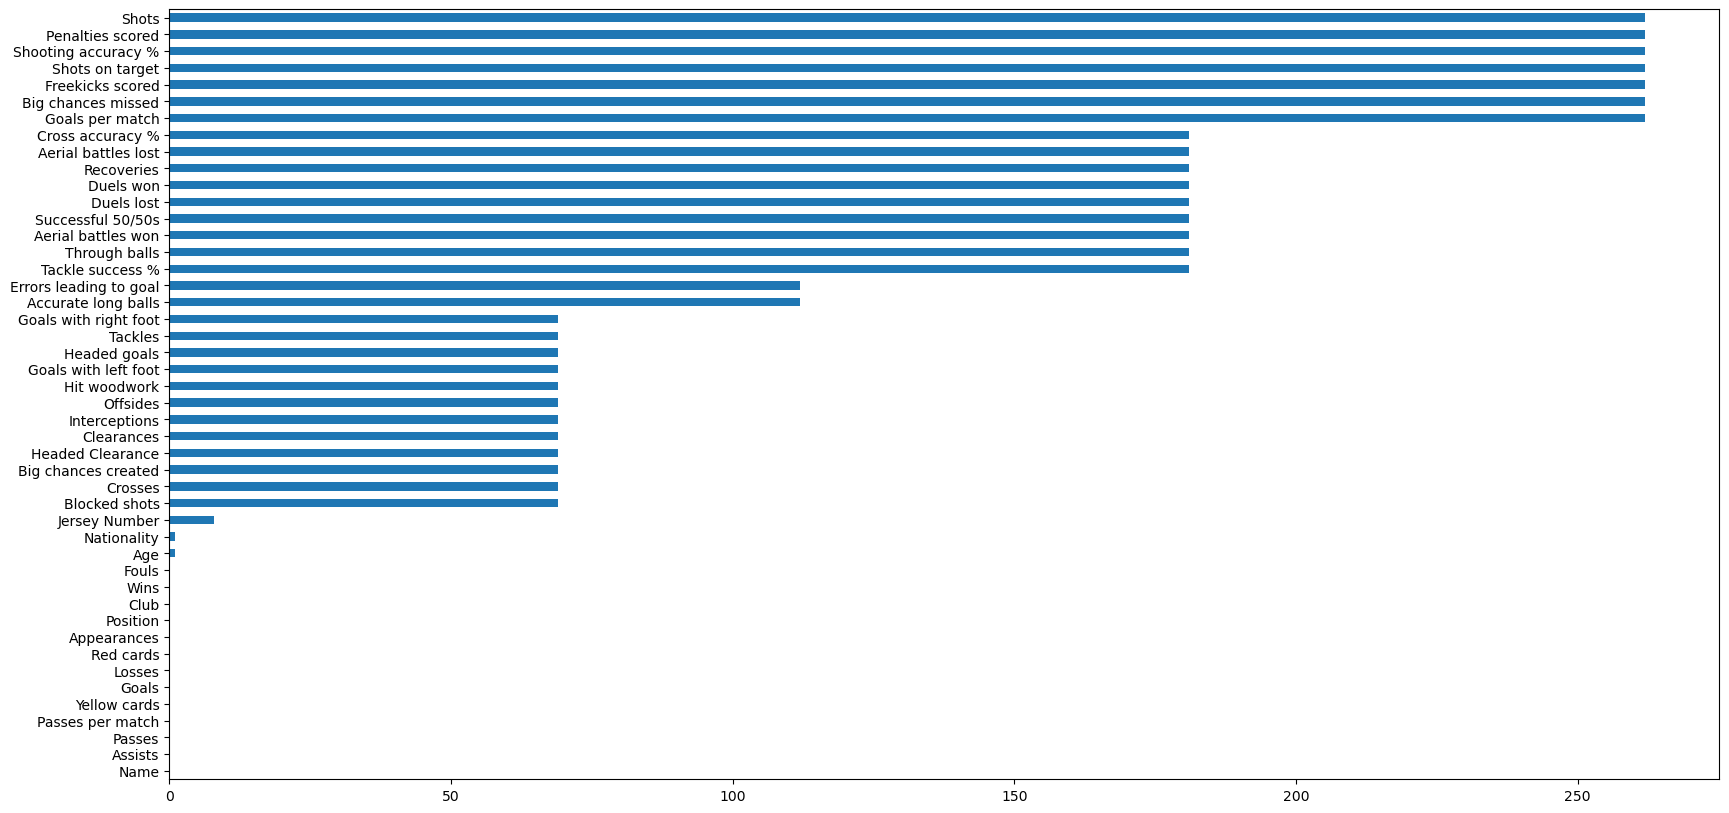

In [44]:
fig = plt.figure(figsize=(20,10))
data.isna().sum().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [45]:
numerical_cols = []
for i in data.columns:
    if data[i].dtypes == 'float64':
        numerical_cols.append(i)
data[numerical_cols]

Jersey Number   Age  Goals per match  Headed goals  \
0              1.0  28.0              NaN           NaN   
1             33.0  26.0              NaN           NaN   
2             13.0  25.0              NaN           NaN   
3              2.0  25.0              NaN           0.0   
4              3.0  23.0              NaN           0.0   
..             ...   ...              ...           ...   
566            7.0  20.0             0.10           0.0   
567            9.0  29.0             0.41           9.0   
568           37.0  24.0             0.05           0.0   
569           17.0  18.0             1.00           0.0   
570           30.0  20.0             0.00           0.0   

     Goals with right foot  Goals with left foot  Penalties scored  \
0                      NaN                   NaN               NaN   
1                      NaN                   NaN               NaN   
2                      NaN                   NaN               NaN   
3                      4.0                   3.0               NaN   
4                      0.0                   1.0               NaN   
..                     ...                   ...               ...   
566                    1.0                   2.0               0.0   
567                   19.0                   4.0               6.0   
568                    5.0                   0.0               0.0   
569                    0.0                   0.0               0.0   
570                    0.0                   0.0               0.0   

     Freekicks scored  Shots  Shots on target  ...  Successful 50/50s  \
0                 NaN    NaN              NaN  ...                NaN   
1                 NaN    NaN              NaN  ...                NaN   
2                 NaN    NaN              NaN  ...                NaN   
3                 NaN    NaN              NaN  ...              196.0   
4                 NaN    NaN              NaN  ...               12.0   
..                ...    ...              ...  ...                ...   
566               0.0   19.0              6.0  ...                NaN   
567               0.0  237.0             82.0  ...                NaN   
568               0.0   78.0             21.0  ...                NaN   
569               0.0    0.0              0.0  ...                NaN   
570               0.0    0.0              0.0  ...                NaN   

     Aerial battles won  Aerial battles lost  Errors leading to goal  \
0                   NaN                  NaN                     7.0   
1                   NaN                  NaN                     0.0   
2                   NaN                  NaN                     0.0   
3                 161.0                215.0                     1.0   
4                  10.0                 16.0                     0.0   
..                  ...                  ...                     ...   
566                 NaN                  NaN                     NaN   
567                 NaN                  NaN                     NaN   
568                 NaN                  NaN                     NaN   
569                 NaN                  NaN                     NaN   
570                 NaN                  NaN                     NaN   

     Passes per match  Big chances created  Crosses  Through balls  \
0               27.86                  NaN      NaN            NaN   
1                0.00                  NaN      NaN            NaN   
2                0.00                  NaN      NaN            NaN   
3               44.53                 28.0    389.0           31.0   
4               32.44                  1.0     45.0            0.0   
..                ...                  ...      ...            ...   
566             12.87                  5.0     52.0            NaN   
567             27.03                 26.0     57.0            NaN   
568             13.66                 13.0    327.0            NaN   
569          

In [46]:
data[numerical_cols]

Jersey Number   Age  Goals per match  Headed goals  \
0              1.0  28.0              NaN           NaN   
1             33.0  26.0              NaN           NaN   
2             13.0  25.0              NaN           NaN   
3              2.0  25.0              NaN           0.0   
4              3.0  23.0              NaN           0.0   
..             ...   ...              ...           ...   
566            7.0  20.0             0.10           0.0   
567            9.0  29.0             0.41           9.0   
568           37.0  24.0             0.05           0.0   
569           17.0  18.0             1.00           0.0   
570           30.0  20.0             0.00           0.0   

     Goals with right foot  Goals with left foot  Penalties scored  \
0                      NaN                   NaN               NaN   
1                      NaN                   NaN               NaN   
2                      NaN                   NaN               NaN   
3                      4.0                   3.0               NaN   
4                      0.0                   1.0               NaN   
..                     ...                   ...               ...   
566                    1.0                   2.0               0.0   
567                   19.0                   4.0               6.0   
568                    5.0                   0.0               0.0   
569                    0.0                   0.0               0.0   
570                    0.0                   0.0               0.0   

     Freekicks scored  Shots  Shots on target  ...  Successful 50/50s  \
0                 NaN    NaN              NaN  ...                NaN   
1                 NaN    NaN              NaN  ...                NaN   
2                 NaN    NaN              NaN  ...                NaN   
3                 NaN    NaN              NaN  ...              196.0   
4                 NaN    NaN              NaN  ...               12.0   
..                ...    ...              ...  ...                ...   
566               0.0   19.0              6.0  ...                NaN   
567               0.0  237.0             82.0  ...                NaN   
568               0.0   78.0             21.0  ...                NaN   
569               0.0    0.0              0.0  ...                NaN   
570               0.0    0.0              0.0  ...                NaN   

     Aerial battles won  Aerial battles lost  Errors leading to goal  \
0                   NaN                  NaN                     7.0   
1                   NaN                  NaN                     0.0   
2                   NaN                  NaN                     0.0   
3                 161.0                215.0                     1.0   
4                  10.0                 16.0                     0.0   
..                  ...                  ...                     ...   
566                 NaN                  NaN                     NaN   
567                 NaN                  NaN                     NaN   
568                 NaN                  NaN                     NaN   
569                 NaN                  NaN                     NaN   
570                 NaN                  NaN                     NaN   

     Passes per match  Big chances created  Crosses  Through balls  \
0               27.86                  NaN      NaN            NaN   
1                0.00                  NaN      NaN            NaN   
2                0.00                  NaN      NaN            NaN   
3               44.53                 28.0    389.0           31.0   
4               32.44                  1.0     45.0            0.0   
..                ...                  ...      ...            ...   
566             12.87                  5.0     52.0            NaN   
567             27.03                 26.0     57.0            NaN   
568             13.66                 13.0    327.0            NaN   
569          

In [47]:
data[numerical_cols].isna().sum()

Jersey Number               8
Age                         1
Goals per match           262
Headed goals               69
Goals with right foot      69
Goals with left foot       69
Penalties scored          262
Freekicks scored          262
Shots                     262
Shots on target           262
Hit woodwork               69
Big chances missed        262
Tackles                    69
Blocked shots              69
Interceptions              69
Clearances                 69
Headed Clearance           69
Recoveries                181
Duels won                 181
Duels lost                181
Successful 50/50s         181
Aerial battles won        181
Aerial battles lost       181
Errors leading to goal    112
Passes per match            0
Big chances created        69
Crosses                    69
Through balls             181
Accurate long balls       112
Offsides                   69
dtype: int64

In [48]:
#drop Jersey Number column
data = data.dropna(subset=['Jersey Number'], axis=0)
data.reset_index(drop=True)

Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
558            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
559          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
560          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
561           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
562      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward   

    Nationality   Age  Appearances  Wins  Losses  Goals  ...  \
0       Germany  28.0           64    28      16      0  ...   
1       England  26.0            0     0       0      0  ...   
2       Iceland  25.0            0     0       0      0  ...   
3         Spain  25.0          160    90      37      7  ...   
4      Scotland  23.0           16     7       5      1  ...   
..          ...   ...          ...   ...     ...    ...  ...   
558    Portugal  20.0           31    14       7      3  ...   
559      Mexico  29.0           78    32      23     32  ...   
560       Spain  24.0          105    27      47      5  ...   
561    Portugal  18.0            1     0       1      0  ...   
562     Ecuador  20.0            0     0       0      0  ...   

     Passes per match  Big chances created  Crosses  Cross accuracy %  \
0               27.86                  NaN      NaN               NaN   
1                0.00                  NaN      NaN               NaN   
2                0.00                  NaN      NaN               NaN   
3               44.53                 28.0    389.0               16%   
4               32.44                  1.0     45.0               18%   
..                ...                  ...      ...               ...   
558             12.87                  5.0     52.0               NaN   
559             27.03                 26.0     57.0               NaN   
560             13.66                 13.0    327.0               NaN   
561              1.00                  0.0      0.0               NaN   
562              0.00                  0.0      0.0               NaN   

     Through balls  Accurate long balls  Yellow cards  Red cards Fouls  \
0              NaN                234.0             2          0     0   
1              NaN                  0.0             0          0     0   
2              NaN                  0.0             0          0     0   
3             31.0                144.0            23          0   125   
4              0.0                 22.0             2          0     9   
..             ...                  ...           ...        ...   ...   
558            NaN                  NaN             3          0    16   
559            NaN                  NaN             7          0    81   
560            NaN                  NaN             4          0    80   
561            NaN                  NaN             0          0     0   
562            NaN                  NaN             0          0     0   

     Offsides  
0         NaN  
1         NaN  
2         NaN  
3         8.0  
4         0.0  
..        ...  
558       5.0  
559      52.0  
560      13.0  
561       0.0  
562       0.0  

[563 rows x 46 columns]

In [49]:
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

C:\Users\Ahmed Said\AppData\Local\Temp\ipykernel_4200\4038535948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])


In [50]:
data[numerical_cols].isna().sum()

Jersey Number             0
Age                       0
Goals per match           0
Headed goals              0
Goals with right foot     0
Goals with left foot      0
Penalties scored          0
Freekicks scored          0
Shots                     0
Shots on target           0
Hit woodwork              0
Big chances missed        0
Tackles                   0
Blocked shots             0
Interceptions             0
Clearances                0
Headed Clearance          0
Recoveries                0
Duels won                 0
Duels lost                0
Successful 50/50s         0
Aerial battles won        0
Aerial battles lost       0
Errors leading to goal    0
Passes per match          0
Big chances created       0
Crosses                   0
Through balls             0
Accurate long balls       0
Offsides                  0
dtype: int64

In [51]:
data[numerical_cols] = data[numerical_cols].astype('int64')
data[numerical_cols]

C:\Users\Ahmed Said\AppData\Local\Temp\ipykernel_4200\619648140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_cols] = data[numerical_cols].astype('int64')


Jersey Number  Age  Goals per match  Headed goals  Goals with right foot  \
0                1   28                2             1                      4   
1               33   26                2             1                      4   
2               13   25                2             1                      4   
3                2   25                2             0                      4   
4                3   23                2             0                      0   
..             ...  ...              ...           ...                    ...   
566              7   20                0             0                      1   
567              9   29                0             9                     19   
568             37   24                0             0                      5   
569             17   18                1             0                      0   
570             30   20                0             0                      0   

     Goals with left foot  Penalties scored  Freekicks scored  Shots  \
0                       2                 0                 0    103   
1                       2                 0                 0    103   
2                       2                 0                 0    103   
3                       3                 0                 0    103   
4                       1                 0                 0    103   
..                    ...               ...               ...    ...   
566                     2                 0                 0     19   
567                     4                 6                 0    237   
568                     0                 0                 0     78   
569                     0                 0                 0      0   
570                     0                 0                 0      0   

     Shots on target  ...  Successful 50/50s  Aerial battles won  \
0                 37  ...                 49                 101   
1                 37  ...                 49                 101   
2                 37  ...                 49                 101   
3                 37  ...                196                 161   
4                 37  ...                 12                  10   
..               ...  ...                ...                 ...   
566                6  ...                 49                 101   
567               82  ...                 49                 101   
568               21  ...                 49                 101   
569                0  ...                 49                 101   
570                0  ...                 49                 101   

     Aerial battles lost  Errors leading to goal  Passes per match  \
0                     85                       7                27   
1                     85                       0                 0   
2                     85                       0                 0   
3                    215                       1                44   
4                     16                       0                32   
..                   ...                     ...               ...   
566                   85                       1                12   
567                   85                       1                27   
568                   85                       1                13   
569                   85                       1                 1   
570                   85                       1                 0   

     Big chances created  Crosses  Through balls  Accurate long balls  \
0                      8      123              8                  234   
1                      8      123              8                    0   
2                      8      123              8                    0   
3                     28      389             31                  144   
4                      1       45              0                   22   
..                   ...      ...            ...                  ...  

In [52]:
cat_cols = []
for i in data.columns:
    if data[i].dtypes == 'object':
        cat_cols.append(i)
cat_cols

['Name',
 'Club',
 'Position',
 'Nationality',
 'Shooting accuracy %',
 'Tackle success %',
 'Cross accuracy %']

In [53]:
data[cat_cols].isna().sum()

Name                     0
Club                     0
Position                 0
Nationality              1
Shooting accuracy %    257
Tackle success %       178
Cross accuracy %       178
dtype: int64

In [54]:
data[data['Nationality'].isna() == True]

Name  Jersey Number          Club    Position Nationality  Age  \
241  Ezgjan Alioski             10  Leeds-United  Midfielder         NaN   25   

     Appearances  Wins  Losses  Goals  ...  Passes per match  \
241            1     1       0      0  ...                11   

     Big chances created  Crosses  Cross accuracy %  Through balls  \
241                    0        1                1%              0   

     Accurate long balls  Yellow cards  Red cards Fouls  Offsides  
241                    0             0          0     1         0  

[1 rows x 46 columns]

In [55]:
data['Nationality'].fillna('Macedonian', axis=0, inplace=True)

C:\Users\Ahmed Said\AppData\Local\Temp\ipykernel_4200\1423995406.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Nationality'].fillna('Macedonian', axis=0, inplace=True)
C:\Users\Ahmed Said\AppData\Local\Temp\ipykernel_4200\1423995406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nationality'].fillna('Macedonian', axis=0,

In [56]:
data['Nationality'].isna().sum()

0

In [57]:
data[data.Name=='Ezgjan Alioski']

Name  Jersey Number          Club    Position Nationality  Age  \
241  Ezgjan Alioski             10  Leeds-United  Midfielder  Macedonian   25   

     Appearances  Wins  Losses  Goals  ...  Passes per match  \
241            1     1       0      0  ...                11   

     Big chances created  Crosses  Cross accuracy %  Through balls  \
241                    0        1                1%              0   

     Accurate long balls  Yellow cards  Red cards Fouls  Offsides  
241                    0             0          0     1         0  

[1 rows x 46 columns]

In [58]:
data[cat_cols].isna().sum()

Name                     0
Club                     0
Position                 0
Nationality              0
Shooting accuracy %    257
Tackle success %       178
Cross accuracy %       178
dtype: int64

In [59]:
data[cat_cols].isna().sum()

Name                     0
Club                     0
Position                 0
Nationality              0
Shooting accuracy %    257
Tackle success %       178
Cross accuracy %       178
dtype: int64

In [60]:
for i in ['Shooting accuracy %','Tackle success %','Cross accuracy %']:
    data = data.dropna(subset=[i], axis=0)
data.reset_index(drop=True)

Name  Jersey Number                     Club  \
0                Mesut Özil             10                  Arsenal   
1            Lucas Torreira             11                  Arsenal   
2    Ainsley Maitland-Niles             15                  Arsenal   
3            Mohamed Elneny             25                  Arsenal   
4            Joseph Willock             28                  Arsenal   
..                      ...            ...                      ...   
190            Romain Saïss             27  Wolverhampton-Wanderers   
191           João Moutinho             28  Wolverhampton-Wanderers   
192      Leander Dendoncker             32  Wolverhampton-Wanderers   
193                 Vitinha             20  Wolverhampton-Wanderers   
194         Meritan Shabani             57  Wolverhampton-Wanderers   

       Position Nationality  Age  Appearances  Wins  Losses  Goals  ...  \
0    Midfielder     Germany   31          184   100      39     33  ...   
1    Midfielder     Uruguay   24           63    28      15      3  ...   
2    Midfielder     England   23           54    26      16      1  ...   
3    Midfielder       Egypt   28           47    29      10      0  ...   
4    Midfielder     England   21           33    12      12      1  ...   
..          ...         ...  ...          ...   ...     ...    ...  ...   
190  Midfielder     Morocco   30           54    24      16      5  ...   
191  Midfielder    Portugal   34           78    32      23      2  ...   
192  Midfielder     Belgium   25           59    26      15      6  ...   
193  Midfielder    Portugal   20            1     1       0      0  ...   
194  Midfielder     Germany   21            0     0       0      0  ...   

     Passes per match  Big chances created  Crosses  Cross accuracy %  \
0                  60                   65      834               35%   
1                  39                    3       40               28%   
2                  34                    4       57               21%   
3                  53                    2       30               13%   
4                  12                    1        9               22%   
..                ...                  ...      ...               ...   
190                45                    4       18               17%   
191                48                   16      422               31%   
192                33                    2       16               31%   
193                 5                    0        0                0%   
194                 0                    0        0                0%   

     Through balls  Accurate long balls  Yellow cards  Red cards Fouls  \
0              121                  276            13          0    95   
1                4                   94            14          1    62   
2                2                   74             6          2    35   
3                4                   83             7          1    24   
4                3                   15             2          0    13   
..             ...                  ...           ...        ...   ...   
190              1                  208            17          1    72   
191             10                  281            11          0    95   
192              0                   81             6          0    43   
193              0                    0             0          0     0   
194              0                    0             0          0     0   

     Offsides  
0          83  
1           0  
2           1  
3           2  
4           0  
..        ...  
190         2  
191         3  
192         1  
193         0  
194         0  

[195 rows x 46 columns]

In [61]:
data.isna().sum()

Name                      0
Jersey Number             0
Club                      0
Position                  0
Nationality               0
Age                       0
Appearances               0
Wins                      0
Losses                    0
Goals                     0
Goals per match           0
Headed goals              0
Goals with right foot     0
Goals with left foot      0
Penalties scored          0
Freekicks scored          0
Shots                     0
Shots on target           0
Shooting accuracy %       0
Hit woodwork              0
Big chances missed        0
Tackles                   0
Tackle success %          0
Blocked shots             0
Interceptions             0
Clearances                0
Headed Clearance          0
Recoveries                0
Duels won                 0
Duels lost                0
Successful 50/50s         0
Aerial battles won        0
Aerial battles lost       0
Errors leading to goal    0
Assists                   0
Passes              

In [62]:
import re
def clean(data_):
    clean_data = [int(re.sub(r'%', '', item)) for item in data_]
    return clean_data

In [63]:
data[['Shooting accuracy %','Tackle success %','Cross accuracy %']] = data[['Shooting accuracy %','Tackle success %','Cross accuracy %']].apply(clean)

In [64]:
data[['Shooting accuracy %','Tackle success %','Cross accuracy %']]

Shooting accuracy %  Tackle success %  Cross accuracy %
13                    45                68                35
14                    26                57                28
15                    29                62                21
16                    11                54                13
17                    28                60                22
..                   ...               ...               ...
561                   39                68                17
562                   23                52                31
563                   41                47                31
564                    0                 0                 0
565                    0                 0                 0

[195 rows x 3 columns]

In [65]:
#check duplicates
data[data.duplicated]

Empty DataFrame
Columns: [Name, Jersey Number, Club, Position, Nationality, Age, Appearances, Wins, Losses, Goals, Goals per match, Headed goals, Goals with right foot, Goals with left foot, Penalties scored, Freekicks scored, Shots, Shots on target, Shooting accuracy %, Hit woodwork, Big chances missed, Tackles, Tackle success %, Blocked shots, Interceptions, Clearances, Headed Clearance, Recoveries, Duels won, Duels lost, Successful 50/50s, Aerial battles won, Aerial battles lost, Errors leading to goal, Assists, Passes, Passes per match, Big chances created, Crosses, Cross accuracy %, Through balls, Accurate long balls, Yellow cards, Red cards, Fouls, Offsides]
Index: []

[0 rows x 46 columns]

In [66]:
# Outliers
numerical_cols = [i for i in data.columns if data[i].dtypes == 'int64']
def Outliers(Data):   
    for k,v in Data[numerical_cols].items():
        q1=v.quantile(0.25)
        q3=v.quantile(0.75)
        iqr=q3-q1
        v_col=v[(v<q1-1.5*iqr) | (v>q3+1.5*iqr)]
        percentage=(v_col.shape[0]/Data.shape[0])*100
        print(f'Column {k} outliers: {percentage : 0.2f}%')
Outliers(data)

Column Jersey Number outliers:  3.08%
Column Age outliers:  0.00%
Column Appearances outliers:  3.08%
Column Wins outliers:  8.21%
Column Losses outliers:  5.64%
Column Goals outliers:  10.26%
Column Goals per match outliers:  21.54%
Column Headed goals outliers:  6.15%
Column Goals with right foot outliers:  12.31%
Column Goals with left foot outliers:  10.26%
Column Penalties scored outliers:  14.87%
Column Freekicks scored outliers:  15.38%
Column Shots outliers:  5.64%
Column Shots on target outliers:  9.23%
Column Shooting accuracy % outliers:  3.59%
Column Hit woodwork outliers:  12.31%
Column Big chances missed outliers:  6.15%
Column Tackles outliers:  8.72%
Column Tackle success % outliers:  17.95%
Column Blocked shots outliers:  4.62%
Column Interceptions outliers:  9.74%
Column Clearances outliers:  10.77%
Column Headed Clearance outliers:  11.28%
Column Recoveries outliers:  6.15%
Column Duels won outliers:  6.15%
Column Duels lost outliers:  4.10%
Column Successful 50/50s 

<h1 style="padding:10px;
    background-color: #3D195B;
    color:white;
    font-family:computermodern;
    font-size:250%;
    text-align:center;">EDA</h1>

In [104]:
df = pd.read_csv("dataset - 2020-09-24.csv", )

In [69]:
df[['Goals','Assists','Yellow cards', 'Red cards']].sum()

Goals           4184
Assists         3018
Yellow cards    4521
Red cards        172
dtype: int64

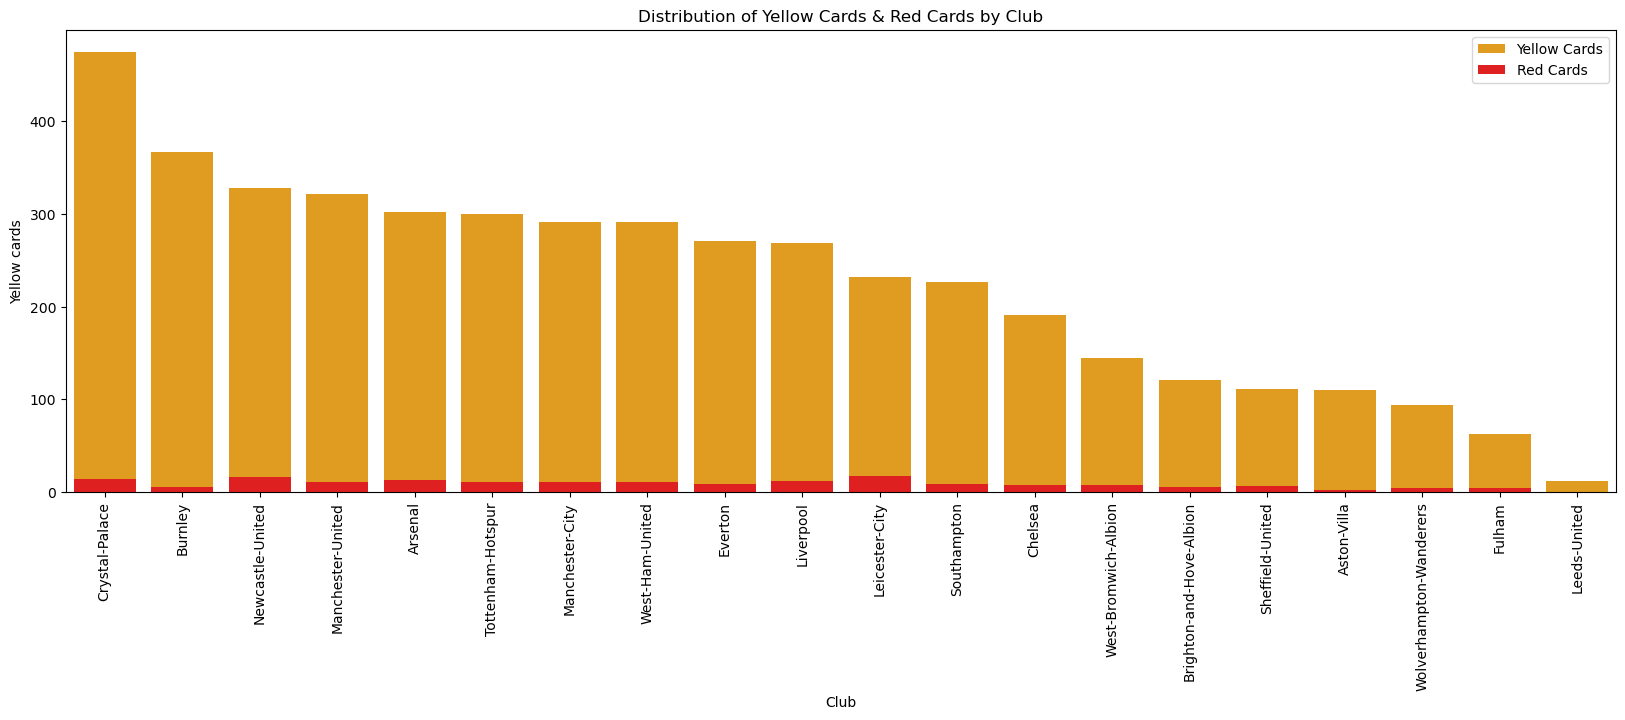

In [103]:
fig = plt.figure(figsize=(20,6))
sns.barplot(data=df.groupby('Club')[['Yellow cards','Red cards']].sum().sort_values(by='Yellow cards', ascending=False),
           x='Club',y='Yellow cards',label='Yellow Cards', color='orange')
sns.barplot(data=df.groupby('Club')[['Yellow cards','Red cards']].sum().sort_values(by='Yellow cards', ascending=False),
           x='Club',y='Red cards',label='Red Cards', color='red')
plt.xticks(rotation=90)
plt.title('Distribution of Yellow Cards & Red Cards by Club')
plt.legend()
plt.show()

In [86]:
#Distribution of Yellow Cards & Red Cards by Player Position
df.groupby('Position')[['Yellow cards','Red cards']].sum().sort_values(by='Yellow cards', ascending=False)

Yellow cards  Red cards
Position                           
Midfielder          1884         63
Defender            1830         65
Forward              706         37
Goalkeeper           101          7

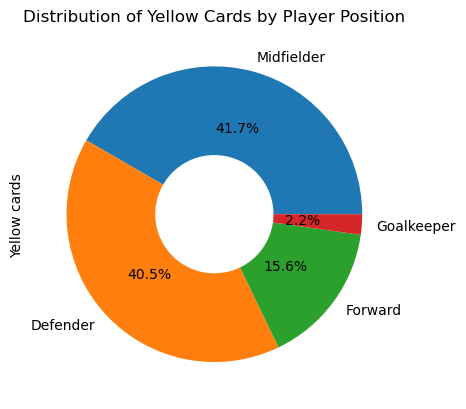

In [85]:
df.groupby('Position')['Yellow cards'].sum().sort_values(ascending=False).plot(kind='pie', wedgeprops={'width': 0.6}, autopct='%1.1f%%')
plt.title("Distribution of Yellow Cards by Player Position")
plt.show()

In [128]:
#Big chances missed by clubs 
df.groupby(['Club'])['Big chances missed'].sum().sort_values(ascending=False)

Club
Manchester-City             335.0
Liverpool                   277.0
Tottenham-Hotspur           246.0
Everton                     221.0
Crystal-Palace              196.0
Leicester-City              183.0
Newcastle-United            182.0
Manchester-United           179.0
Chelsea                     168.0
Southampton                 147.0
Arsenal                     131.0
Burnley                     125.0
West-Ham-United              99.0
Brighton-and-Hove-Albion     71.0
Sheffield-United             64.0
West-Bromwich-Albion         52.0
Wolverhampton-Wanderers      43.0
Aston-Villa                  34.0
Fulham                       31.0
Leeds-United                  6.0
Name: Big chances missed, dtype: float64

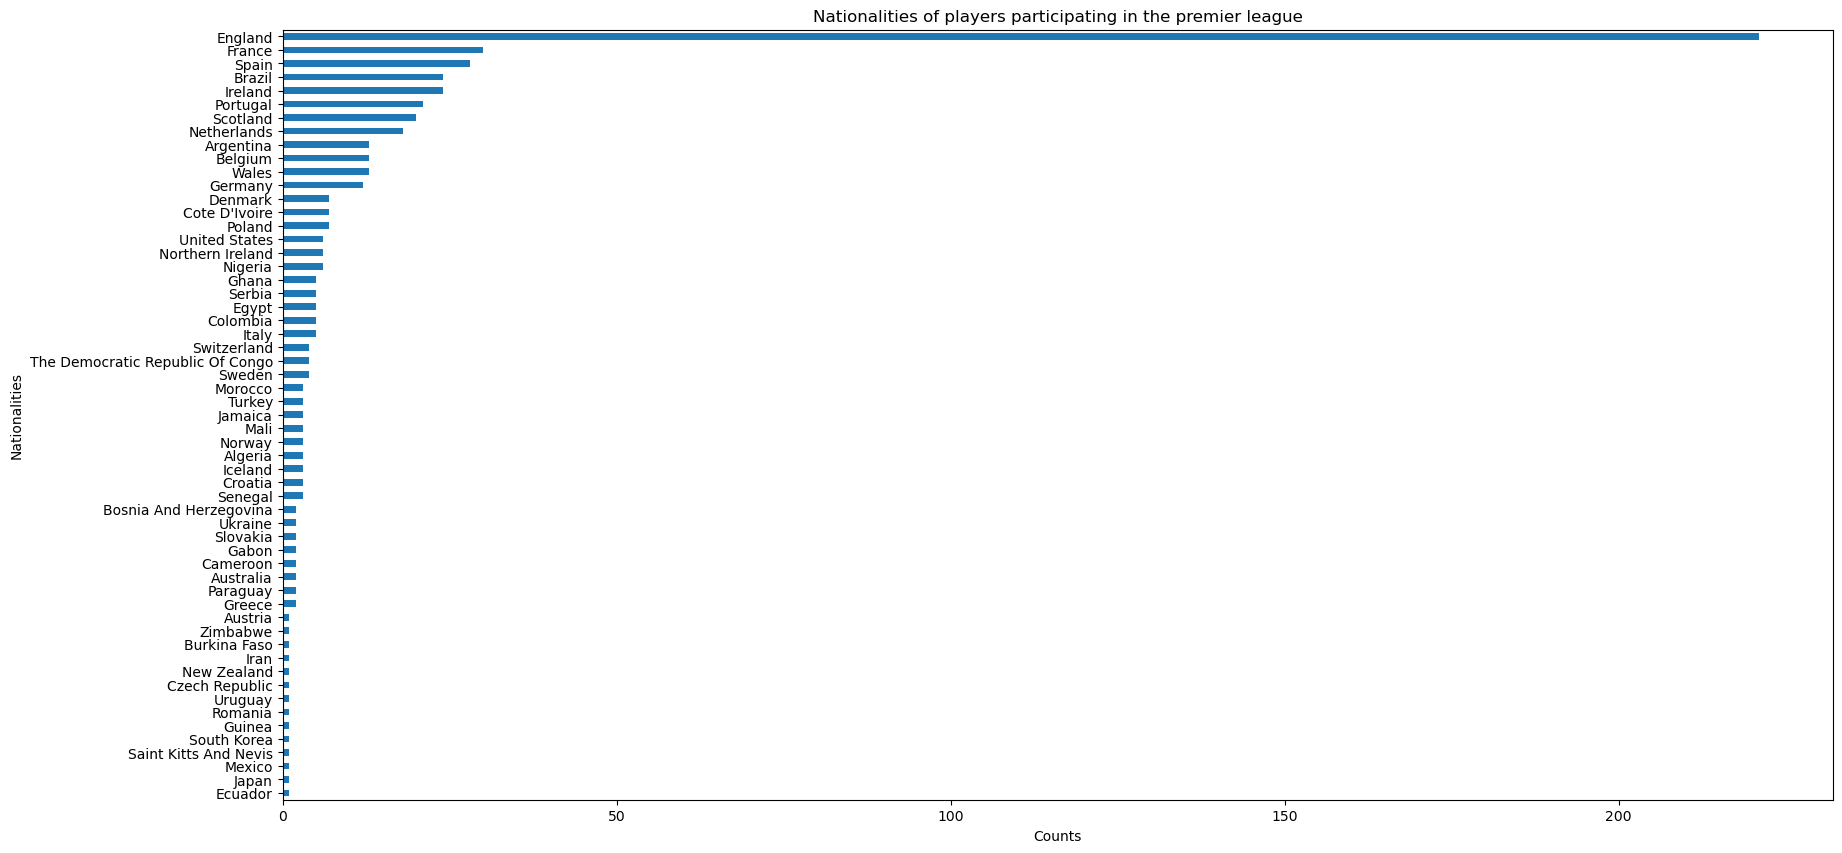

In [129]:
#Nationalities of players participating in the premier league
fig = plt.figure(figsize=(20,10))
df.Nationality.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.ylabel("Nationalities")
plt.xlabel('Counts')
plt.title("Nationalities of players participating in the premier league")
plt.show()

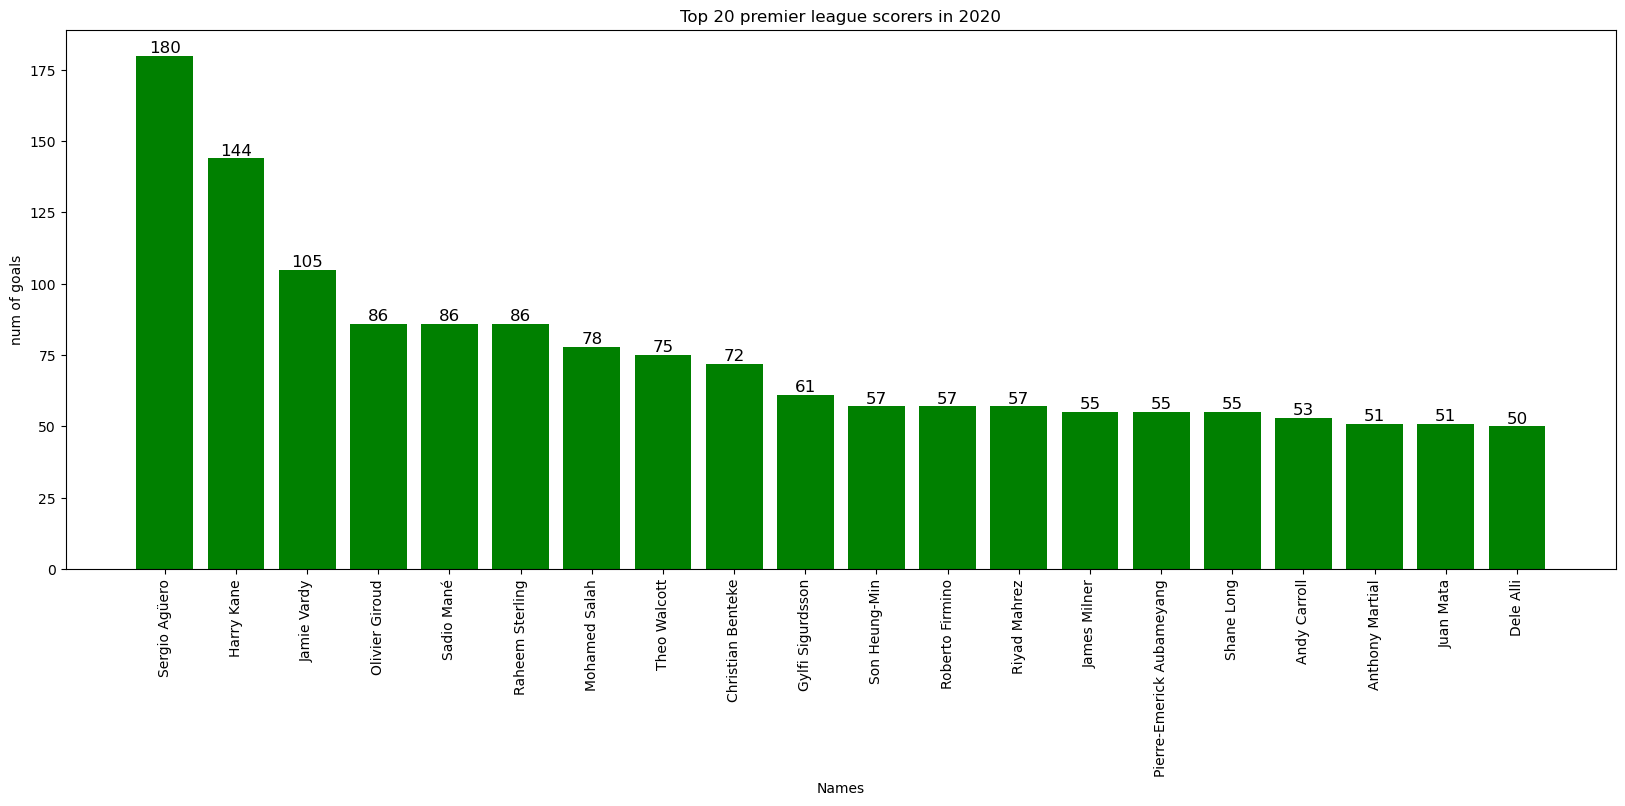

In [130]:
#Top 20 premier league scorers in 2020
fig = plt.figure(figsize=(20,7))
Top_20_Scorers = df.groupby('Name')[['Goals', 'Nationality','Appearances']].sum().sort_values(by='Goals', ascending=False)[:20]
bars1 = plt.bar(Top_20_Scorers.index, Top_20_Scorers['Goals'], color='green')
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=12)

plt.title('Top 20 premier league scorers in 2020')
plt.xlabel('Names')
plt.ylabel('num of goals')
plt.xticks(rotation=90)
plt.show()

In [137]:
#Top 20 premier league scorers in 2020
df2 = df[['Name', 'Club', 'Goals', 'Assists','Nationality']].copy()
df['Total Contribution'] = df['Goals'] + df['Assists']
top10_players = df.sort_values(by='Total Contribution', ascending=False).head(10)

top10_players[['Name', 'Nationality', 'Club', 'Goals', 'Assists', 'Total Contribution']].set_index('Name')

Nationality               Club  Goals  Assists  \
Name                                                              
Sergio Agüero      Argentina    Manchester-City    180       46   
Harry Kane           England  Tottenham-Hotspur    144       24   
James Milner         England          Liverpool     55       84   
Jamie Vardy          England     Leicester-City    105       29   
Raheem Sterling      England    Manchester-City     86       45   
Theo Walcott         England            Everton     75       51   
Sadio Mané           Senegal          Liverpool     86       29   
Olivier Giroud        France            Chelsea     86       28   
Mohamed Salah          Egypt          Liverpool     78       29   
Gylfi Sigurdsson     Iceland            Everton     61       45   

                  Total Contribution  
Name                                  
Sergio Agüero                    226  
Harry Kane                       168  
James Milner                     139  
Jamie Vardy                      134  
Raheem Sterling                  131  
Theo Walcott                     126  
Sadio Mané                       115  
Olivier Giroud                   114  
Mohamed Salah                    107  
Gylfi Sigurdsson                 106

In [265]:
to_10_players.index

Index(['Sergio Agüero', 'Harry Kane', 'Jamie Vardy', 'Olivier Giroud',
       'Sadio Mané', 'Raheem Sterling', 'Mohamed Salah', 'Theo Walcott',
       'Christian Benteke', 'Gylfi Sigurdsson'],
      dtype='object', name='Name')

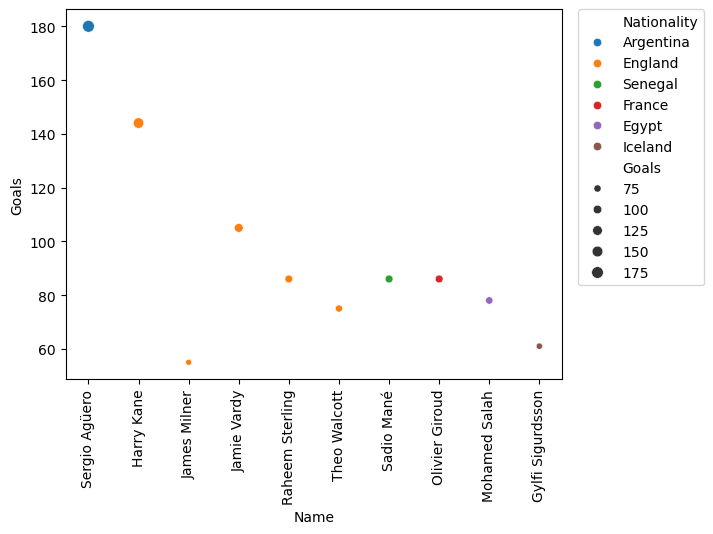

In [266]:
sns.scatterplot(top10_players, x='Name', y='Goals', size='Goals', hue='Nationality')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.3,1.02))
plt.show()

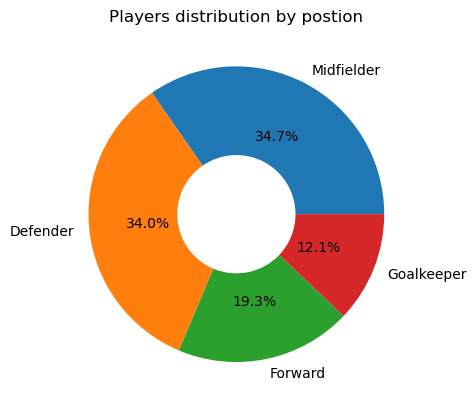

In [132]:
#Players distribution by postion
df['Position'].value_counts().plot(kind='pie', wedgeprops={'width': 0.6}, autopct='%1.1f%%')
plt.title("Players distribution by postion")
plt.ylabel("")
plt.show()

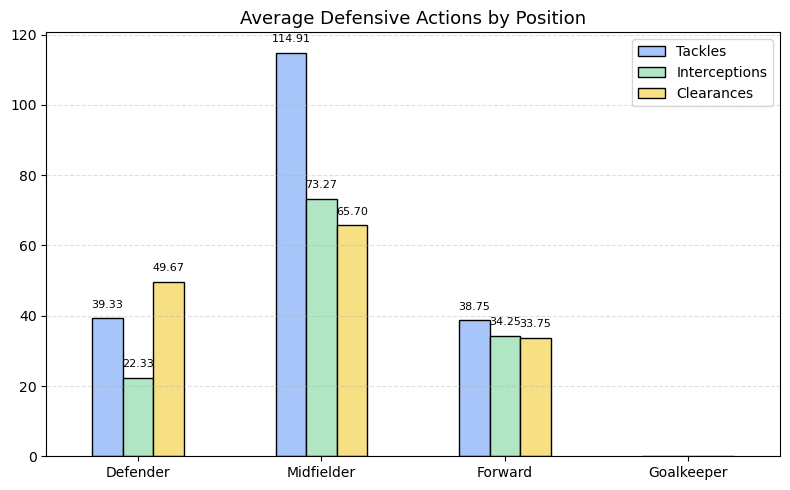

In [133]:
#Average Defensive Actions by Position
avg_defensive = data.groupby('Position')[['Tackles', 'Interceptions', 'Clearances']].mean()

positions = ['Defender', 'Midfielder', 'Forward', 'Goalkeeper']
avg_defensive = avg_defensive.loc[avg_defensive.index.intersection(positions)]
avg_defensive = avg_defensive.reindex(positions)

colors = ['#a7c5f9', '#b0e6c4', '#f7e084']   

ax = avg_defensive.plot(kind='bar', figsize=(8,5), color=colors, edgecolor='black')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height() + 3),
                    ha='center', fontsize=8, color='black')

plt.title("Average Defensive Actions by Position", fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('')
plt.xlabel('')
plt.legend(['Tackles', 'Interceptions', 'Clearances'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

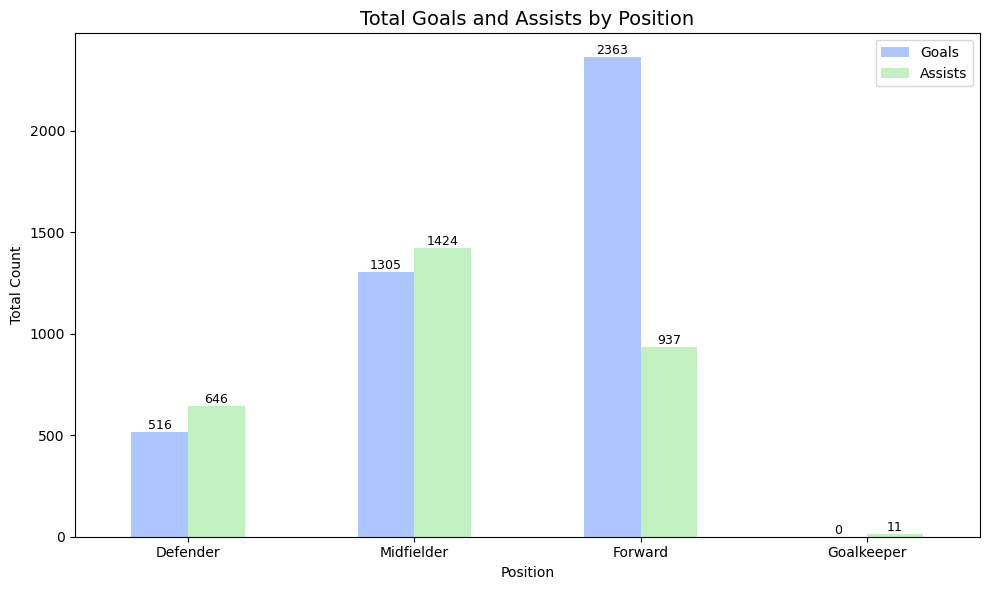

In [134]:
#Total Goals and Assists by Position
goals_assists_by_pos = df.groupby('Position')[['Goals', 'Assists']].sum()
positions = ['Defender', 'Midfielder', 'Forward', 'Goalkeeper']
goals_assists_by_pos = goals_assists_by_pos.reindex(positions)

colors = ['#aec6ff', '#c1f0c1']  
ax = goals_assists_by_pos.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title("Total Goals and Assists by Position", fontsize=14)
plt.ylabel("Total Count")
plt.xticks(rotation=0)
plt.legend(title="")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

In [138]:
#top10 shooting Accuracy
top_10_shootingAcc = data[['Name','Shooting accuracy %']].sort_values(by='Shooting accuracy %', ascending=False)[:10].set_index('Name')
top_10_shootingAcc

Shooting accuracy %
Name                                  
Donny van de Beek                  100
Ezgjan Alioski                     100
Allan                              100
Mateusz Klich                      100
Harvey Elliott                     100
Tommy Doyle                        100
Henri Saivet                       100
Nathan Tella                        50
Marko Grujic                        50
Josh Onomah                         50

In [139]:
# top10 Cross Accuracy
top_10_crossAcc = data[['Name','Cross accuracy %']].sort_values(by='Cross accuracy %', ascending=False)[:10].set_index('Name')
top_10_crossAcc

Cross accuracy %
Name                               
Nampalys Mendy                   67
Eberechi Eze                     67
Henri Lansbury                   50
Matthew Longstaff                50
Daniel Podence                   44
Kalvin Phillips                  40
Jairo Riedewald                  38
Fabinho                          37
Jean Michael Seri                36
Mesut Özil                       35

In [305]:
df[['Name','Duels won']].sort_values(by='Duels won', ascending=False).set_index('Name')[:10]

Duels won
Name                         
Gary Cahill            1946.0
James Milner           1843.0
Phil Jagielka          1842.0
Mark Noble             1607.0
Kyle Walker            1510.0
James Tomkins          1442.0
Branislav Ivanovic     1427.0
Jonny Evans            1417.0
César Azpilicueta      1400.0
Phil Bardsley          1395.0

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


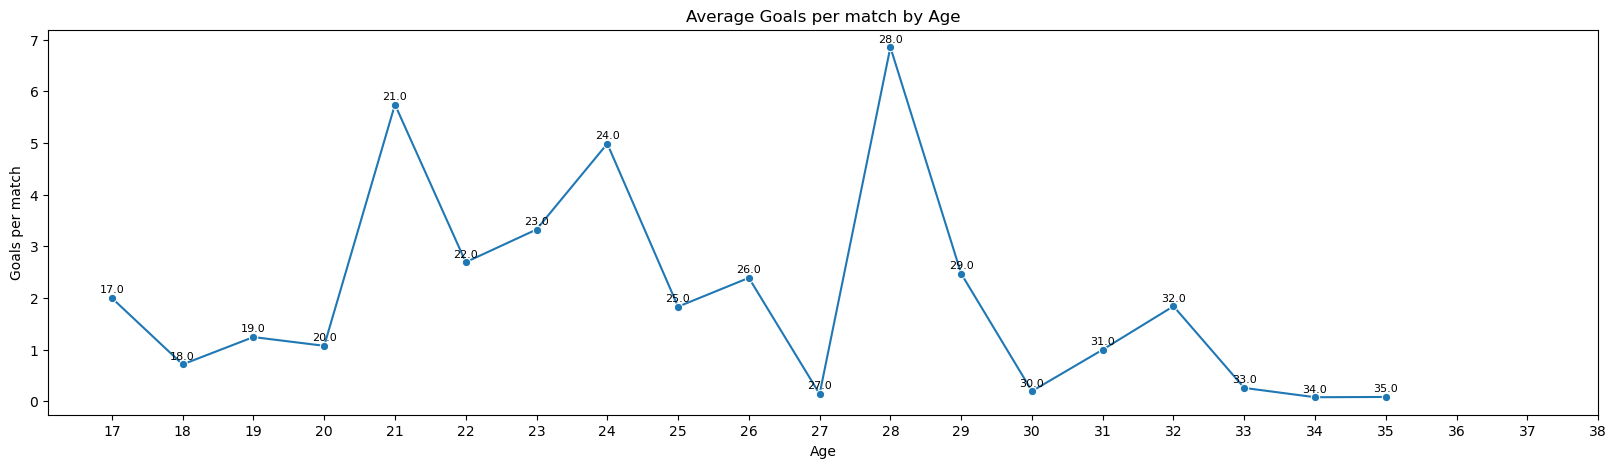

In [140]:
# Average Goals per match by Age
fig = plt.figure(figsize=(20,5))
avg_goals_by_age = df.groupby('Age')[['Goals per match']].mean().sort_values(by='Goals per match', ascending=False)
sns.lineplot(data = avg_goals_by_age, x='Age', y='Goals per match', marker='o')
plt.xticks(avg_goals_by_age.index)
plt.title("Average Goals per match by Age")

for x, y in zip(avg_goals_by_age.index, avg_goals_by_age.values):
    plt.text(x, y + 0.1, str(x), ha='center', fontsize=8, color='black')
plt.show()

#### `Insights`
Players aged 28 peak in average goals per match (6.85), well above all other age groups
A notable secondary peak occurs at age 21 (5.74) and 24 (4.99), indicating early and late 20s are most prolific
Performance drops sharply after age 30, with negligible output beyond 33

C:\Users\Ahmed Said\AppData\Local\Temp\ipykernel_4200\1743536250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total'] = df['Goals'] + df['Assists']


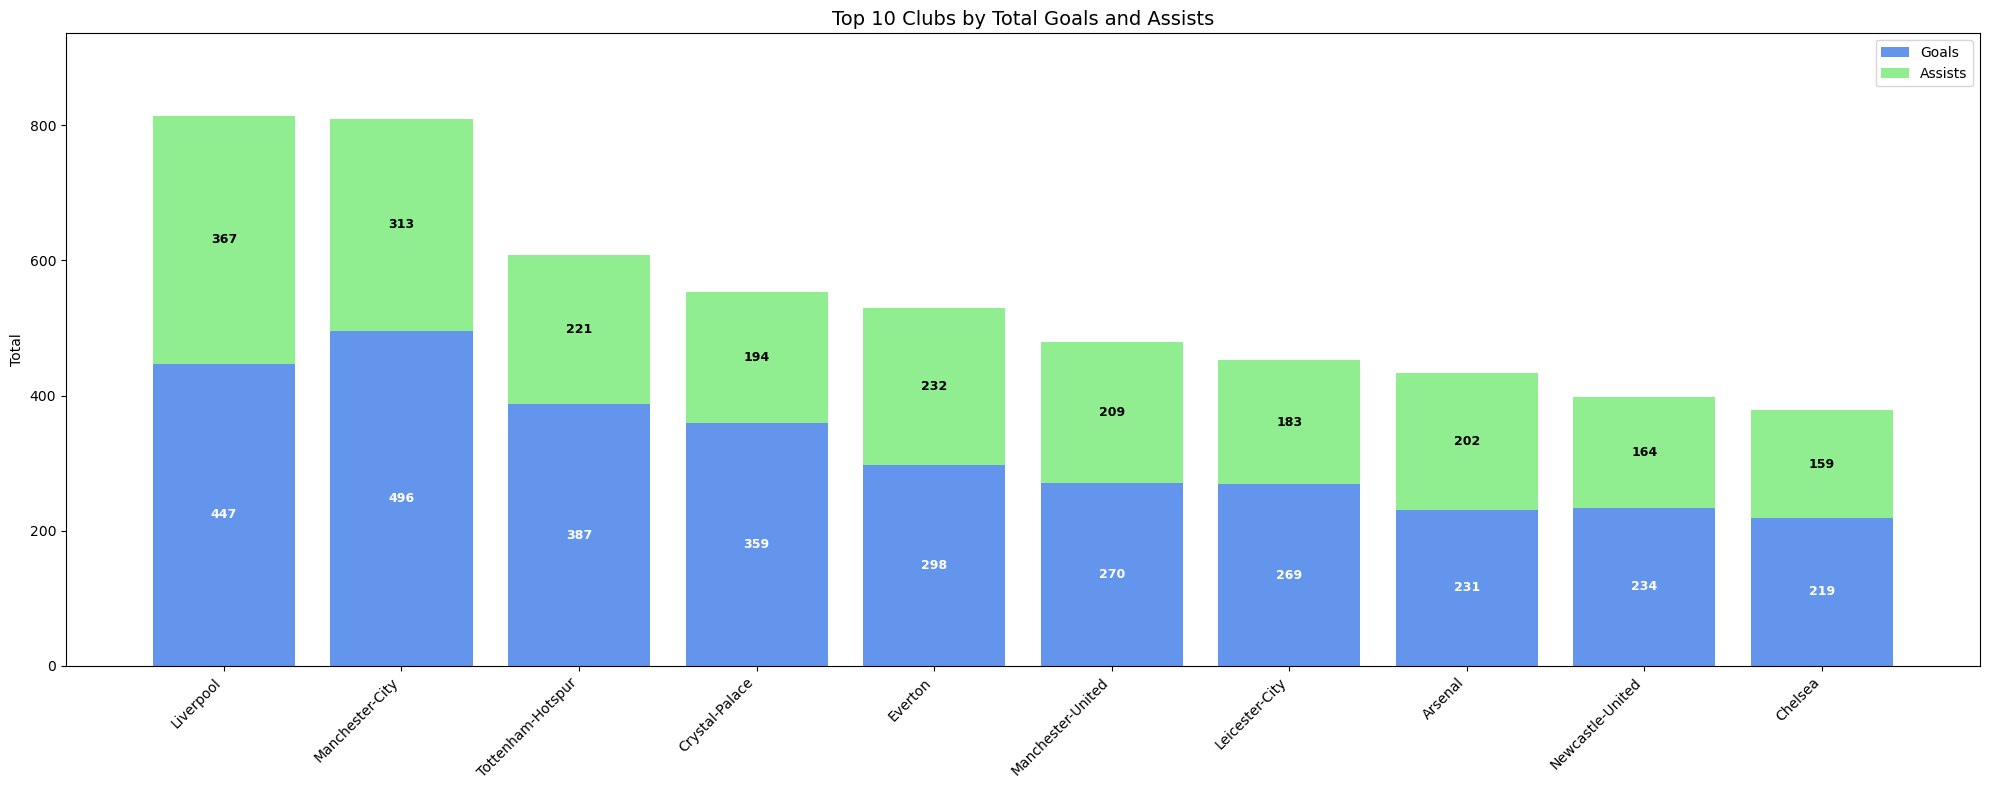

In [141]:
#Top 10 Clubs by Total Goals and Assists

df2 = df[['Club', 'Goals', 'Assists']]
df2['Total'] = df['Goals'] + df['Assists']
top10 = df2.groupby('Club', as_index=False).sum().nlargest(10, 'Total')

fig, ax = plt.subplots(figsize=(20, 8))
bars1 = ax.bar(top10['Club'], top10['Goals'], label='Goals', color='cornflowerblue')
bars2 = ax.bar(top10['Club'], top10['Assists'], bottom=top10['Goals'], label='Assists', color='lightgreen')

for i, (goals, assists) in enumerate(zip(top10['Goals'], top10['Assists'])):
    ax.text(i, goals / 2, str(int(goals)), ha='center', va='center', color='white', fontsize=9, fontweight='bold')
    ax.text(i, goals + (assists / 2), str(int(assists)), ha='center', va='center', color='black', fontsize=9, fontweight='bold')
    
ax.set_title('Top 10 Clubs by Total Goals and Assists', fontsize=14)
ax.set_ylabel('Total')
ax.set_ylim(0, top10['Total'].max() * 1.15)   
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

#### `Insights`
Manchester City and Liverpool dominate offensive output with over 800 combined goals and assists each
Tottenham and Crystal Palace form a distant second tier (~600 total), highlighting a competitive drop-off
Chelsea ranks lowest among top ten, with under 400 combined goals and assists, suggesting room for attacking improvement

In [311]:
df.groupby('Club')['Passes per match'].sum()[:5]

Club
Arsenal                     1055.82
Aston-Villa                  676.92
Brighton-and-Hove-Albion     613.62
Burnley                      519.40
Chelsea                      953.67
Name: Passes per match, dtype: float64

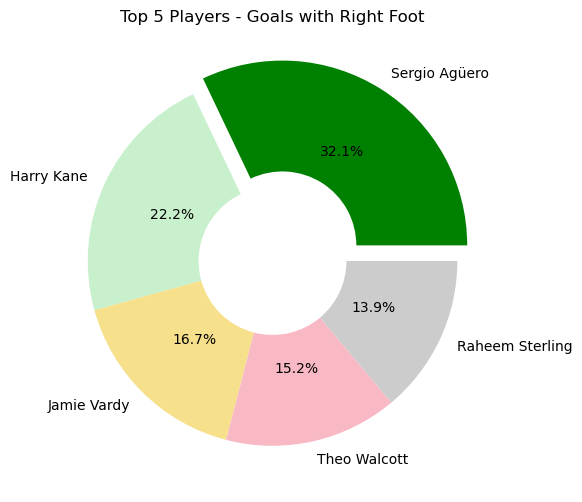

In [142]:
#Top 5 Players - Goals with Right Foot

colors = ['green', '#c8f0cc', '#f7e08c', '#f8b9c5', '#cccccc']
top5_right_foot = df.groupby('Name')['Goals with right foot'] .sum() .sort_values(ascending=False)[:5]
top5_right_foot.plot(kind='pie', wedgeprops={'width': 0.6}, autopct='%1.1f%%', colors=colors, figsize=(6,6), explode=[0.1,0,0,0,0])
plt.title("Top 5 Players - Goals with Right Foot")
plt.ylabel("")
plt.savefig('top5_right_foot_goals.png', transparent=True, dpi=300)
plt.show()

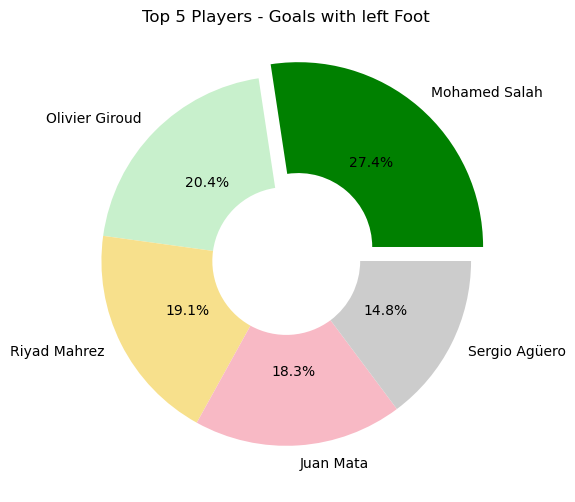

In [355]:
colors = ['green', '#c8f0cc', '#f7e08c', '#f8b9c5', '#cccccc']
top5_left_foot = df.groupby('Name')['Goals with left foot'] .sum() .sort_values(ascending=False)[:5]
top5_left_foot.plot(kind='pie', wedgeprops={'width': 0.6}, autopct='%1.1f%%', colors=colors, figsize=(6,6), explode=[0.1,0,0,0,0])
plt.title("Top 5 Players - Goals with left Foot")
plt.ylabel("")
plt.savefig('top5_left_foot_goals.png', transparent=True, dpi=300)
plt.show()

In [153]:
data2 = data.copy()
data2['Defense Score'] = data2['Tackle success %'] + data2['Duels won'] + data2['Interceptions'] + data2['Clearances']
best_defender = data2.loc[data2['Defense Score'].idxmax()]
best_defender

Name                      James Milner
Jersey Number                        7
Club                         Liverpool
Position                    Midfielder
Nationality                    England
Age                                 34
Appearances                        539
Wins                               272
Losses                             133
Goals                               55
Goals per match                      0
Headed goals                         1
Goals with right foot               38
Goals with left foot                 8
Penalties scored                    17
Freekicks scored                     4
Shots                              496
Shots on target                    151
Shooting accuracy %                 30
Hit woodwork                         7
Big chances missed                  14
Tackles                            803
Tackle success %                    77
Blocked shots                      174
Interceptions                      437
Clearances               

In [371]:
top_errors = df.groupby('Name')['Errors leading to goal'].sum().sort_values(ascending=False)[:5]
top_errors

Name
Joe Hart            20.0
Hugo Lloris         18.0
Lukasz Fabianski    17.0
Wayne Hennessey     13.0
Jordan Pickford     13.0
Name: Errors leading to goal, dtype: float64

In [144]:
Goalkeeper_data = df[df['Position']=='Goalkeeper'][['Name','Club','Nationality','Age','Saves','Errors leading to goal','Clean sheets']]
Goalkeeper_data

Name                     Club Nationality   Age  Saves  \
0              Bernd Leno                  Arsenal     Germany  28.0  222.0   
1              Matt Macey                  Arsenal     England  26.0    0.0   
2    Rúnar Alex Rúnarsson                  Arsenal     Iceland  25.0    0.0   
30             Tom Heaton              Aston-Villa     England  34.0  408.0   
31              Jed Steer              Aston-Villa     England  28.0    2.0   
..                    ...                      ...         ...   ...    ...   
521          David Martin          West-Ham-United     England  34.0   15.0   
522       Darren Randolph          West-Ham-United     Ireland  33.0   85.0   
523          Nathan Trott          West-Ham-United     England  21.0    0.0   
549          Rui Patrício  Wolverhampton-Wanderers    Portugal  32.0  195.0   
550            John Ruddy  Wolverhampton-Wanderers     England  33.0  389.0   

     Errors leading to goal  Clean sheets  
0                       7.0          14.0  
1                       0.0           0.0  
2                       0.0           0.0  
30                      3.0          28.0  
31                      0.0           0.0  
..                      ...           ...  
521                     1.0           2.0  
522                     5.0           6.0  
523                     0.0           0.0  
549                     3.0          21.0  
550                    12.0          25.0  

[69 rows x 7 columns]

In [145]:
Goalkeeper_data.isna().sum()

Name                      0
Club                      0
Nationality               0
Age                       0
Saves                     0
Errors leading to goal    0
Clean sheets              0
dtype: int64

In [146]:
top_goalkeepers = Goalkeeper_data.groupby('Name')[['Saves','Errors leading to goal','Clean sheets']].sum().sort_values(by='Saves',ascending=False)
missing_data = top_goalkeepers[(top_goalkeepers['Saves']==0.0) & (top_goalkeepers['Errors leading to goal']==0.0) & (top_goalkeepers['Clean sheets']==0.0)]
missing_data

Saves  Errors leading to goal  Clean sheets
Name                                                               
Kamil Grabara             0.0                     0.0           0.0
Stephen Henderson         0.0                     0.0           0.0
Caoimhin Kelleher         0.0                     0.0           0.0
Bailey Peacock-Farrell    0.0                     0.0           0.0
Brandon Austin            0.0                     0.0           0.0
Wes Foderingham           0.0                     0.0           0.0
Will Norris               0.0                     0.0           0.0
Alfie Whiteman            0.0                     0.0           0.0
Zack Steffen              0.0                     0.0           0.0
Christian Walton          0.0                     0.0           0.0
Robert Sánchez            0.0                     0.0           0.0
Rúnar Alex Rúnarsson      0.0                     0.0           0.0
Daniel Langley            0.0                     0.0           0.0
Jonathan Bond             0.0                     0.0           0.0
Nathan Trott              0.0                     0.0           0.0
Michael Verrips           0.0                     0.0           0.0
Matt Macey                0.0                     0.0           0.0
Elia Caprile              0.0                     0.0           0.0
Mark Gillespie            0.0                     0.0           0.0
Harry Lewis               0.0                     0.0           0.0
Lovre Kalinic             0.0                     0.0           0.0
Jason Steele              0.0                     0.0           0.0
Kiko Casilla              0.0                     0.0           0.0
João Virgínia             0.0                     0.0           0.0

In [147]:
top_goalkeepers.drop(missing_data.index, inplace=True)
top_goalkeepers

Saves  Errors leading to goal  Clean sheets
Name                                                          
Joe Hart           941.0                    20.0         127.0
David de Gea       870.0                    13.0         113.0
Lukasz Fabianski   807.0                    17.0          63.0
Hugo Lloris        703.0                    18.0          92.0
Wayne Hennessey    617.0                    13.0          37.0
Kasper Schmeichel  599.0                     6.0          65.0
Jordan Pickford    462.0                    13.0          38.0
Adrián             454.0                     9.0          37.0
Scott Carson       433.0                    10.0          30.0
Tom Heaton         408.0                     3.0          28.0
John Ruddy         389.0                    12.0          25.0
Mat Ryan           340.0                     2.0          26.0
Alex McCarthy      314.0                     8.0          17.0
Martin Dubravka    261.0                     9.0          26.0
Fraser Forster     259.0                     7.0          37.0
Nick Pope          237.0                     2.0          26.0
Bernd Leno         222.0                     7.0          14.0
Rui Patrício       195.0                     3.0          21.0
Jonas Lössl        191.0                     5.0          14.0
Ederson            184.0                     5.0          52.0
Vicente Guaita     182.0                     2.0          18.0
Kepa Arrizabalaga  142.0                     2.0          22.0
Alisson            137.0                     4.0          35.0
Aaron Ramsdale     132.0                     1.0           5.0
Paulo Gazzaniga    127.0                     7.0           6.0
Lee Grant           99.0                     0.0           9.0
Dean Henderson      97.0                     1.0          13.0
Eldin Jakupovic     94.0                     1.0           6.0
Darren Randolph     85.0                     5.0           6.0
Willy Caballero     72.0                     2.0          11.0
Karl Darlow         65.0                     1.0           6.0
Angus Gunn          63.0                     3.0           5.0
Loris Karius        51.0                     2.0          13.0
Emiliano Martínez   44.0                     0.0           7.0
Sergio Romero       20.0                     0.0           6.0
Fabri               16.0                     1.0           0.0
Ørjan Nyland        15.0                     0.0           1.0
David Martin        15.0                     1.0           2.0
David Button        14.0                     0.0           1.0
Danny Ward           9.0                     0.0           0.0
Sam Johnstone        6.0                     0.0           0.0
Simon Moore          5.0                     1.0           0.0
Alphonse Areola      3.0                     0.0           0.0
Jed Steer            2.0                     0.0           0.0
Marek Rodák          2.0                     0.0           0.0

In [148]:
top_goalkeepers = top_goalkeepers
top_goalkeepers

Saves  Errors leading to goal  Clean sheets
Name                                                          
Joe Hart           941.0                    20.0         127.0
David de Gea       870.0                    13.0         113.0
Lukasz Fabianski   807.0                    17.0          63.0
Hugo Lloris        703.0                    18.0          92.0
Wayne Hennessey    617.0                    13.0          37.0
Kasper Schmeichel  599.0                     6.0          65.0
Jordan Pickford    462.0                    13.0          38.0
Adrián             454.0                     9.0          37.0
Scott Carson       433.0                    10.0          30.0
Tom Heaton         408.0                     3.0          28.0
John Ruddy         389.0                    12.0          25.0
Mat Ryan           340.0                     2.0          26.0
Alex McCarthy      314.0                     8.0          17.0
Martin Dubravka    261.0                     9.0          26.0
Fraser Forster     259.0                     7.0          37.0
Nick Pope          237.0                     2.0          26.0
Bernd Leno         222.0                     7.0          14.0
Rui Patrício       195.0                     3.0          21.0
Jonas Lössl        191.0                     5.0          14.0
Ederson            184.0                     5.0          52.0
Vicente Guaita     182.0                     2.0          18.0
Kepa Arrizabalaga  142.0                     2.0          22.0
Alisson            137.0                     4.0          35.0
Aaron Ramsdale     132.0                     1.0           5.0
Paulo Gazzaniga    127.0                     7.0           6.0
Lee Grant           99.0                     0.0           9.0
Dean Henderson      97.0                     1.0          13.0
Eldin Jakupovic     94.0                     1.0           6.0
Darren Randolph     85.0                     5.0           6.0
Willy Caballero     72.0                     2.0          11.0
Karl Darlow         65.0                     1.0           6.0
Angus Gunn          63.0                     3.0           5.0
Loris Karius        51.0                     2.0          13.0
Emiliano Martínez   44.0                     0.0           7.0
Sergio Romero       20.0                     0.0           6.0
Fabri               16.0                     1.0           0.0
Ørjan Nyland        15.0                     0.0           1.0
David Martin        15.0                     1.0           2.0
David Button        14.0                     0.0           1.0
Danny Ward           9.0                     0.0           0.0
Sam Johnstone        6.0                     0.0           0.0
Simon Moore          5.0                     1.0           0.0
Alphonse Areola      3.0                     0.0           0.0
Jed Steer            2.0                     0.0           0.0
Marek Rodák          2.0                     0.0           0.0

In [149]:
top_goalkeepers['Rate %'] = ((top_goalkeepers['Saves']+top_goalkeepers['Clean sheets'])/(top_goalkeepers['Saves']+top_goalkeepers['Clean sheets']+top_goalkeepers['Errors leading to goal']))*100
top_goalkeepers['Saves_and_cleansheet'] = top_goalkeepers['Saves']+top_goalkeepers['Clean sheets']
top5_goalkeepers = top_goalkeepers.sort_values(by='Saves_and_cleansheet', ascending=False)[:5]
top5_goalkeepers

Saves  Errors leading to goal  Clean sheets     Rate %  \
Name                                                                        
Joe Hart           941.0                    20.0         127.0  98.161765   
David de Gea       870.0                    13.0         113.0  98.694779   
Lukasz Fabianski   807.0                    17.0          63.0  98.083427   
Hugo Lloris        703.0                    18.0          92.0  97.785978   
Kasper Schmeichel  599.0                     6.0          65.0  99.104478   

                   Saves_and_cleansheet  
Name                                     
Joe Hart                         1068.0  
David de Gea                      983.0  
Lukasz Fabianski                  870.0  
Hugo Lloris                       795.0  
Kasper Schmeichel                 664.0

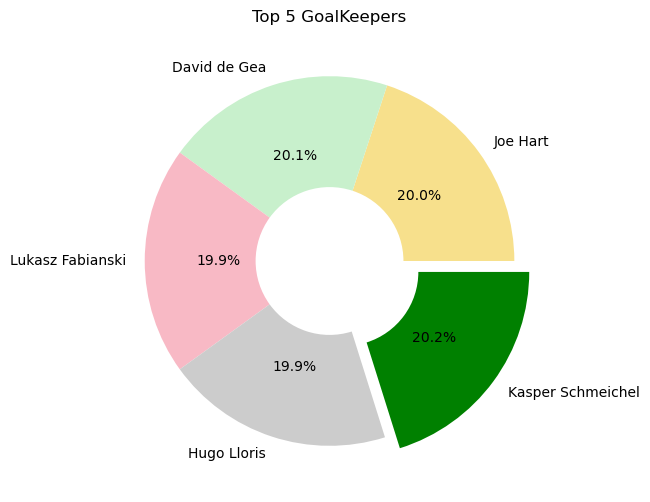

In [150]:
#Top 5 GoalKeepers
colors = ['#f7e08c', '#c8f0cc', '#f8b9c5','#cccccc', 'green']
top5_goalkeepers['Rate %'].plot(kind='pie', wedgeprops={'width': 0.6}, autopct='%1.1f%%', colors=colors, figsize=(6,6), explode=[0.0,0,0,0,0.1])
plt.ylabel("")
plt.title("Top 5 GoalKeepers")
plt.ylabel("")
plt.savefig('Top 5 GoalKeepers.png', transparent=True, dpi=300)
plt.show()

In [151]:
df[df['Name']=='Kasper Schmeichel']

Name  Jersey Number            Club    Position Nationality  \
255  Kasper Schmeichel            1.0  Leicester-City  Goalkeeper     Denmark   

      Age  Appearances  Wins  Losses  Goals  ...  High Claims  Catches  \
255  33.0          211    91      69      0  ...        158.0     84.0   

     Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  Red cards  \
255               142.0       655.0      1718.0            11          0   

     Fouls Offsides  Total Contribution  
255      0      NaN                   0  

[1 rows x 60 columns]